<a href="https://colab.research.google.com/github/surapitttha/Python-upskill/blob/main/Gini_Impurity_Index_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gini Impurity Index

## Gini Impurity Index คืออะไร?

**Gini Impurity Index** หรือ **ดัชนีความไม่บริสุทธิ์ของจินี** เป็นการวัดความไม่แน่นอน หรือความไม่บริสุทธิ์ของกลุ่มข้อมูลที่ใช้ในการสร้างต้นไม้ตัดสินใจ (Decision Tree) ใน Machine Learning

ค่า Gini Impurity อยู่ในช่วงระหว่าง 0 ถึง 0.5

- **ค่า 0:** หมายถึงกลุ่มข้อมูลมีความบริสุทธิ์สูงสุด ทุกจุดข้อมูลอยู่ในคลาสเดียวกัน
- **ค่า 0.5:** หมายถึงกลุ่มข้อมูลมีความไม่บริสุทธิ์สูงสุด มีการกระจายของคลาสแบบสุ่ม

**การคำนวณ Gini Impurity:**

สูตรการคำนวณ Gini Impurity มีดังนี้:

```
Gini(S) = 1 - Σ p_i^2
```

โดยที่:

- `S` : แทนกลุ่มข้อมูล
- `p_i` : แทนสัดส่วนของจุดข้อมูลในคลาสที่ i

**การประยุกต์ใช้ Gini Impurity:**

Gini Impurity ถูกใช้ใน Decision Tree เพื่อ:

1. **เลือกจุดแยก (Split Point):** เลือกจุดตัดที่ดีที่สุดในการแบ่งกลุ่มข้อมูลออกเป็นสองกลุ่มย่อย โดยจุดที่เลือกจะทำให้ Gini Impurity ของกลุ่มย่อยทั้งสองมีค่าน้อยที่สุด
2. **วัดประสิทธิภาพของโมเดล:** บ่งบอกถึงความแม่นยำของโมเดล Decision Tree

**ข้อดีของ Gini Impurity:**

- เข้าใจง่าย คำนวณง่าย
- ทำงานได้ดีกับชุดข้อมูลที่มีจำนวนคลาสมาก

**ข้อเสียของ Gini Impurity:**

- ไวต่อ outliers
- ไม่เหมาะกับชุดข้อมูลที่มีคลาสไม่สมดุล (imbalanced dataset)

**สรุป:**

Gini Impurity Index เป็นเครื่องมือสำคัญในการสร้าง Decision Tree ช่วยให้เลือกจุดแยกที่ดีที่สุดและประเมินประสิทธิภาพของโมเดล อย่างไรก็ตาม ควรพิจารณาข้อจำกัดของ Gini Impurity ร่วมกับปัจจัยอื่นๆ

**แหล่งข้อมูลเพิ่มเติม:**

- [https://en.wikipedia.org/wiki/Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [https://medium.com/thatascience/gini-index-vs-entropy-for-information-gain-in-decision-trees-252f9afa8229](https://medium.com/thatascience/gini-index-vs-entropy-for-information-gain-in-decision-trees-252f9afa8229)
- [http://ir.buu.ac.th/dspace/handle/1513/204](http://ir.buu.ac.th/dspace/handle/1513/204)


## 2 clases

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
def cal_gini(cls1, cls2):      # number of Class1 and Class2
    total = cls1 + cls2        # sum Class1 and Class2
    gini = 1 - ((cls1/total)**2 + (cls2/total)**2 )
    return gini

In [43]:
# cal_gini(2 , 2)
# cal_gini(3 , 3)
cal_gini(45 , 45)

0.5

In [44]:
# cal_gini(2 , 0)
cal_gini(178 , 0)

0.0

In [45]:
cal_gini(0 , 2)

0.0

In [46]:
cal_gini(3 , 3)
# cal_gini(5 , 5)

0.5

In [47]:
# Class1=3,  Class2=7   (Total=10)
cal_gini(3 , 7)

0.42000000000000004

In [48]:
cal_gini(7 , 3)

0.42000000000000004

In [49]:
# cal_gini(2 , 8)
cal_gini(0 , 10)

0.0

## 3 Classes

In [50]:
def cal_gini3(cls1, cls2, cls3):
    total = cls1 + cls2 + cls3
    gini = 1 - ((cls1/total)**2 + (cls2/total)**2 + (cls3/total)**2)
    return gini

In [51]:
cal_gini3(2, 2, 2)

0.6666666666666667

In [52]:
cal_gini3(0, 1, 2)

0.4444444444444444

In [53]:
cal_gini3(0, 0, 2)

0.0

# Decision Tree : Simple Loan

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [55]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/data/simple_loan.csv')
df

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no
5,middle,False,n,fair,no
6,middle,False,n,good,no
7,middle,True,y,good,yes
8,middle,False,y,excellent,yes
9,middle,False,y,excellent,yes


In [56]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

In [57]:
df.target.unique()

array(['no', 'yes'], dtype=object)

In [58]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [59]:
df.groupby('target')

In [60]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [61]:
X = df.drop(['target'],axis=1)

y = df.target

##Train(Problem)

In [62]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

ValueError: could not convert string to float: 'young'

## Label Encoding
เข้ารหัส เปลี่ยน ข้อความ -> ตัวเลข
- <b>age</b> : middle, old, young  
middle -> 0 <br>old -> 1   
young -> 2
- <b>own_house</b>:  n -> 0  ,   y -> 1

In [63]:
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [64]:
def labelEncode(data, columns):
    for i in columns:
#         print(i)
        data[i + '_'], _ = pd.factorize(data[i], sort=True)

feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)

# scikit : sklearn.preprocessing.LabelEncoder

**ชื่อฟังก์ชัน:** `labelEncode`

**วัตถุประสงค์:** ฟังก์ชันนี้ทำการเข้ารหัสข้อมูลแบบแปะป้าย (label encoding) ให้กับคอลัมน์ที่ระบุไว้ในชุดข้อมูล

**การทำงาน:**

1. **รับพารามิเตอร์ 2 ตัว:**
   - `data`: ชุดข้อมูล (pandas DataFrame)
   - `columns`: รายชื่อของคอลัมน์ที่ต้องการเข้ารหัส (รายการของชื่อสตริง)

2. **วนลูปผ่านคอลัมน์ที่ระบุ:**
   - วนลูปสำหรับแต่ละคอลัมน์ (`i`) ในรายการ `columns`

3. **เข้ารหัสข้อมูลในคอลัมน์:**
   - ภายในลูป
     - ใช้ฟังก์ชัน `pd.factorize` ของไลบรารี pandas:
        - `data[i + '_'], _ = pd.factorize(data[i], sort=True)`
           - `data[i]`: เลือกคอลัมน์ที่กำลังประมวลผลอยู่ในลูปปัจจุบัน (คอลัมน์ที่ `i`)
           - `data[i + '_']`: สร้างคอลัมน์ใหม่โดยเพิ่มเครื่องหมายขีดล่าง (`_`) ต่อท้ายชื่อคอลัมน์เดิม (`i`) เพื่อเก็บข้อมูลที่เข้ารหัสแล้ว
           - `_`: ตัวแปรทิ้งไว้เฉยๆ ไม่ได้ถูกนำไปใช้ (ผลลัพธ์ประการที่สองจาก `pd.factorize`)
           - `sort=True`: เรียงลำดับข้อมูลที่ไม่ซ้ำกันตามตัวอักษรก่อนการเข้ารหัส (ค่าเริ่มต้นเป็น False)
     - ฟังก์ชัน `pd.factorize` ทำหน้าที่:
        - แปลงข้อมูลข้อความที่ไม่ซ้ำกันในคอลัมน์ไปเป็นตัวเลขเรียงลำดับ (0, 1, 2, ...)
        - คืนค่าเป็นタプル (tuple) ประกอบด้วย
           - อันดับแรก: ชุดข้อมูลที่เข้ารหัสแล้ว (numpy array)
           - อันดับสอง: รายการข้อมูลข้อความที่ไม่ซ้ำกัน (Index)  **(เราไม่ใช้ผลลัพธ์นี้ในโค้ดนี้)**

4. **ตัวอย่างการใช้งาน:**
   - `feature_columns = ['age', 'employed', 'own_house', 'credit']` นิยามรายการของคอลัมน์ที่ต้องการเข้ารหัส
   - `labelEncode(df, feature_columns)` เรียกใช้ฟังก์ชัน `labelEncode` โดยป้อนชุดข้อมูล (`df`) และรายการคอลัมน์ (`feature_columns`)

**ผลลัพธ์:**

- ฟังก์ชันนี้จะเพิ่มคอลัมน์ใหม่ลงในชุดข้อมูล (`df`) โดยมีชื่อเป็นชื่อคอลัมน์เดิมต่อท้ายด้วยเครื่องหมายขีดล่าง (`_`)  
- คอลัมน์ใหม่นี้จะเก็บข้อมูลที่เข้ารหัสแล้วเป็นตัวเลขเรียงลำดับแทนข้อมูลข้อความเดิม  
- **หมายเหตุ:** ข้อมูลต้นฉบับในคอลัมน์เดิมยังคงอยู่ ไม่ได้ถูกแทนที่

**ข้อดีของการเข้ารหัสแบบแปะป้าย:**

- ช่วยให้การคำนวณทางคณิตศาสตร์กับข้อมูลประเภทข้อความง่ายขึ้น
- บางอ algorith ของ Machine Learning อาจต้องการข้อมูลที่เป็นตัวเลข

**ข้อควรระวัง:**

- การเข้ารหัสแบบแปะป้ายอาจสูญเสียข้อมูลบางส่วน เช่น ลำดับของข้อมูลข้อความเดิม
- ควรเลือกเทคนิคการเข้ารหัสที่เหมาะสมกับลักษณะของข้อมูล

In [65]:
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_
0,young,False,n,fair,no,2,0,0,1
1,young,False,n,good,no,2,0,0,2
2,young,True,n,good,yes,2,1,0,2
3,young,True,y,fair,yes,2,1,1,1
4,young,False,n,fair,no,2,0,0,1
5,middle,False,n,fair,no,0,0,0,1
6,middle,False,n,good,no,0,0,0,2
7,middle,True,y,good,yes,0,1,1,2
8,middle,False,y,excellent,yes,0,0,1,0
9,middle,False,y,excellent,yes,0,0,1,0


In [66]:
df['target_'],class_names = pd.factorize(df.target)
df.sample()

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
12,old,True,n,good,yes,1,1,0,2,1


In [67]:
class_names

Index(['no', 'yes'], dtype='object')

In [68]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns]
X.head()

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


from matplotlib import pyplot as plt
_df_0['employed_'].plot(kind='hist', bins=20, title='employed_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['own_house_'].plot(kind='hist', bins=20, title='own_house_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['credit_'].plot(kind='hist', bins=20, title='credit_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='employed_', y='own_house_', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='own_house_', y='credit_', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['age_']
  ys = series['employed_']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('age_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age_')
_ = plt.ylabel('employed_')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['age_']
  ys = series['own_house_']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('age_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age_')
_ = plt.ylabel('own_house_')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['age_']
  ys = series['credit_']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('age_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age_')
_ = plt.ylabel('credit_')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['age_']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'age_'}, axis=1)
              .sort_values('age_', ascending=True))
  xs = counted['age_']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('age_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age_')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['employed_'].plot(kind='line', figsize=(8, 4), title='employed_')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['own_house_'].plot(kind='line', figsize=(8, 4), title='own_house_')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['credit_'].plot(kind='line', figsize=(8, 4), title='credit_')
plt.gca().spines[['top', 'right']].set_visible(False)

In [69]:
for i in enc_columns :
  print(i[:-1])
  print(df[i[:-1]].unique())
  print(df[i].unique())
  print('---------')

age
['young' 'middle' 'old']
[2 0 1]
---------
employed
[False  True]
[0 1]
---------
own_house
['n' 'y']
[0 1]
---------
credit
['fair' 'good' 'excellent']
[1 2 0]
---------


## อธิบายโค้ด Python ภาษาไทย

โค้ดนี้ใช้สำหรับวิเคราะห์ข้อมูลที่เข้ารหัสแล้วด้วยฟังก์ชัน `labelEncode`  จากตัวอย่างโค้ดที่ให้มานั้น ประกอบด้วย 3 ส่วนหลัก ดังนี้:

**1. กำหนดคอลัมน์ที่เข้ารหัส:**

```python
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
```

- บรรทัดนี้สร้างรายการชื่อคอลัมน์ใหม่ (`enc_columns`) โดยแต่ละชื่อจะขึ้นต้นด้วยชื่อคอลัมน์เดิมจาก `labelEncode`  และต่อท้ายด้วย `_`
- ตัวอย่างเช่น:
    - `age_`  สอดคล้องกับคอลัมน์ `age` ที่เข้ารหัสแล้ว
    - `employed_` สอดคล้องกับคอลัมน์ `employed` ที่เข้ารหัสแล้ว
    - `own_house_` สอดคล้องกับคอลัมน์ `own_house` ที่เข้ารหัสแล้ว
    - `credit_` สอดคล้องกับคอลัมน์ `credit` ที่เข้ารหัสแล้ว

**2. วนลูปวิเคราะห์ข้อมูล:**

```python
for i in enc_columns :
  print(i[:-1])
  print(df[i[:-1]].unique())
  print(df[i].unique())
  print('---------')
```

- วนลูป (`for`) วนซ้ำไปมาสำหรับแต่ละชื่อคอลัมน์ใน `enc_columns`
- ตัวแปร `i` จะแทนชื่อคอลัมน์ที่กำลังวิเคราะห์ในแต่ละรอบ

**การวิเคราะห์ในแต่ละรอบ:**

- **พิมพ์ชื่อคอลัมน์:**
    - `print(i[:-1])` แสดงชื่อคอลัมน์ต้นฉบับ (ตัด `_` ท้ายออก)

- **แสดงข้อมูลที่ไม่ซ้ำกันก่อนเข้ารหัส:**
    - `print(df[i[:-1]].unique())` แสดงรายการข้อมูลข้อความที่ไม่ซ้ำกันในคอลัมน์ต้นฉบับ (ก่อนเข้ารหัส)
    - `df[i[:-1]]` เลือกคอลัมน์ต้นฉบับ
    - `.unique()` แสดงรายการข้อมูลที่ไม่ซ้ำกัน

- **แสดงข้อมูลที่เข้ารหัสแล้ว:**
    - `print(df[i].unique())` แสดงรายการตัวเลขที่เข้ารหัสแล้วในคอลัมน์นั้น
    - `df[i]` เลือกคอลัมน์ที่เข้ารหัสแล้ว

- **พิมพ์เส้นประ:**
    - `print('---------')` แสดงเส้นประเพื่อแยกผลลัพธ์ของแต่ละคอลัมน์

**สรุป:**

โค้ดนี้ช่วยวิเคราะห์ข้อมูลที่เข้ารหัสแล้ว โดยแสดงชื่อคอลัมน์ ข้อมูลที่ไม่ซ้ำกันก่อนเข้ารหัส และข้อมูลที่เข้ารหัสแล้ว ช่วยให้เข้าใจว่าข้อมูลถูกแปลงเป็นตัวเลขอย่างไร และข้อมูลต้นฉบับมีรูปแบบอย่างไร

**หมายเหตุ:**

- โค้ดนี้สันนิษฐานว่ามีการเรียกใช้ฟังก์ชัน `labelEncode` ไว้ก่อนหน้าแล้ว
- โค้ดนี้แสดงผลลัพธ์บนหน้าจอเท่านั้น  ไม่ได้บันทึกข้อมูลลงในชุดข้อมูล


In [70]:
y = df.target_

##Split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [74]:
X.shape , y.shape

((17, 4), (17,))

In [75]:
X_train.shape , y_train.shape

((11, 4), (11,))

In [77]:
X_test.shape ,y_test.shape

AttributeError: 'DataFrame' object has no attribute 'shpae'

In [78]:
X_train

,age_,employed_,own_house_,credit_
13,1,1,0,0
0,2,0,0,1
2,2,1,0,2
7,0,1,1,2
6,0,0,0,2
4,2,0,0,1
9,0,0,1,0
15,1,0,0,0
12,1,1,0,2
10,1,0,1,0


In [79]:
y_train

13    1
0     0
2     1
7     1
6     0
4     0
9     1
15    1
12    1
10    1
3     1
Name: target_, dtype: int64

In [80]:
X_test

,age_,employed_,own_house_,credit_
16,2,1,1,1
1,2,0,0,2
5,0,0,0,1
11,1,0,1,2
8,0,0,1,0
14,1,0,0,1


In [81]:
y_test

16    1
1     0
5     0
11    1
8     1
14    0
Name: target_, dtype: int64

##Train

## Parameter ของ DecisionTreeClassifier ใน Python

`DecisionTreeClassifier` ใน Python มาพร้อมกับพารามิเตอร์มากมายที่ช่วยให้คุณปรับแต่งโมเดลต้นไม้ตัดสินใจของคุณได้  พารามิเตอร์เหล่านี้ควบคุมวิธีการสร้างต้นไม้ วิธีการตัดสินใจ และประสิทธิภาพโดยรวมของโมเดล

**พารามิเตอร์ที่สำคัญบางประการ:**

**1. criterion:**

- กำหนดวิธีการวัดความบริสุทธิ์ของโหนดในต้นไม้ ตัวเลือกทั่วไปคือ:
    - **"gini" (ค่าเริ่มต้น):** ใช้ดัชนีความไม่บริสุทธิ์ของ Gini
    - **"entropy":** ใช้เอนโทรปี
- ส่งผลต่อการเลือกจุดแยกที่ดีที่สุดในการแบ่งกลุ่มข้อมูล

**2. splitter:**

- กำหนดวิธีการแบ่งกลุ่มข้อมูล ตัวเลือกทั่วไปคือ:
    - **"best" (ค่าเริ่มต้น):** เลือกจุดแยกที่ดีที่สุดที่ลดความบริสุทธิ์ของโหนดมากที่สุด
    - **"random":** เลือกจุดแยกแบบสุ่ม
- ส่งผลต่อโครงสร้างของต้นไม้และประสิทธิภาพ

**3. max_depth:**

- กำหนดความลึกสูงสุดของต้นไม้ ต้นไม้ที่ลึกกว่าจะซับซ้อนและอาจโอเวอร์ฟิตข้อมูลมากขึ้น
- ค่าเริ่มต้นคือ `None` ซึ่งหมายความว่าไม่มีขีด จำกัด ความลึก

**4. min_samples_split:**

- กำหนดจำนวนขั้นต่ำของตัวอย่างที่ต้องอยู่ในโหนดก่อนที่จะแบ่ง ตัวเลขที่สูงขึ้นจะสร้างต้นไม้ที่มีโหนดกว้างขึ้น
- ค่าเริ่มต้นคือ `2`

**5. min_samples_leaf:**

- กำหนดจำนวนขั้นต่ำของตัวอย่างในใบไม้ของต้นไม้ ตัวเลขที่สูงขึ้นจะสร้างใบไม้ที่มีขนาดใหญ่ขึ้น
- ค่าเริ่มต้นคือ `1`

**6. max_features:**

- กำหนดจำนวนคุณลักษณะสูงสุดที่จะพิจารณาในการแบ่งแต่ละโหนด ตัวเลขที่สูงขึ้นจะช่วยให้โมเดลเรียนรู้จากคุณลักษณะได้มากขึ้น
- ค่าเริ่มต้นคือ `None` ซึ่งหมายความว่าพิจารณาคุณลักษณะทั้งหมด

**7. class_weight:**

- กำหนดน้ำหนักสำหรับแต่ละคลาส ตัวเลือกที่มีประโยชน์เมื่อชุดข้อมูลมีความไม่สมดุล
- ค่าเริ่มต้นคือ `None` ซึ่งหมายความว่าให้น้ำหนักเท่ากันกับทุกคลาส

**8. random_state:**

- กำหนดเมล็ดพันธุ์สำหรับตัวสร้างตัวเลขสุ่ม ควบคุมการสุ่มในการเลือกจุดแยกและโครงสร้างต้นไม้
- ช่วยให้มั่นใจว่าโมเดลจะสร้างผลลัพธ์ที่สอดคล้องกันเมื่อฝึกอบรมกับข้อมูลชุดเดียวกัน

**วิธีการตั้งค่าพารามิเตอร์:**

- คุณสามารถตั้งค่าพารามิเตอร์เหล่านี้เมื่อสร้างตัวอย่าง `DecisionTreeClassifier`:

```python
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
```

- คุณสามารถปรับแต่งพารามิเตอร์เหล่านี้เพื่อปรับประสิทธิภาพโมเดลของคุณบนชุดข้อมูลเฉพาะของคุณ  วิธีทั่วไปคือการใช้การค้นหาแบบกริดหรือการปรับแต่งแบบสุ่ม

**แหล่งข้อมูลเพิ่มเติม:**

- เอกสาร Scikit-learn DecisionTreeClassifier: [https://scikit-learn.org/stable/modules/tree.html](https://scikit-learn.org/stable/modules/tree.html)
- ตัวอย่างการปรับแต่งพารามิเตอร์ DecisionTreeClassifier: [https://stackoverflow.com/questions/38709690/scikit-learn-using-gridsearchcv-on-decisiontreeclassifier](https://stackoverflow.com/questions/38709690/scikit-learn-using-gridsearchcv-on-decisiontreeclassifier)


In [82]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=1)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [83]:
score = model.score(X_test,y_test)
print(f'Score =  {score.round(3)}')

Score =  0.667


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)


print('Score -> {:.3f}' . format(model.score(X_test, y_test)))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(3))

print(classification_report(y_test,y_pred,target_names = class_names))

cm = confusion_matrix(y_test,y_pred)

print(cm)

Score -> 0.667
Accuracy Score:  0.667
              precision    recall  f1-score   support

          no       0.60      1.00      0.75         3
         yes       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

[[3 0]
 [2 1]]


In [85]:
print(np.array(y_test), '<- y_test (Actual or True data)')
print(y_pred, '<- y_predicted from the model')

[1 0 0 1 1 0] <- y_test (Actual or True data)
[1 0 0 0 0 0] <- y_predicted from the model


In [86]:
for i in y_pred: # แสดงชื่อ Label แทน 0 1
    print(class_names[i])

yes
no
no
no
no
no


## Evaluation

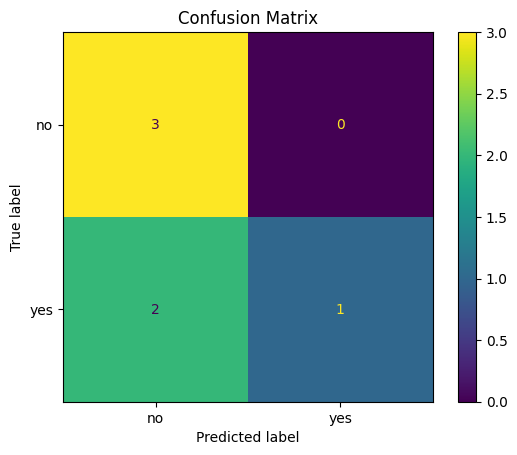

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = class_names    #

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('Confusion Matrix')
plt.show()

In [91]:
model.feature_importances_

array([0., 1., 0., 0.])

In [88]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target', 'age_', 'employed_',
       'own_house_', 'credit_', 'target_'],
      dtype='object')

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

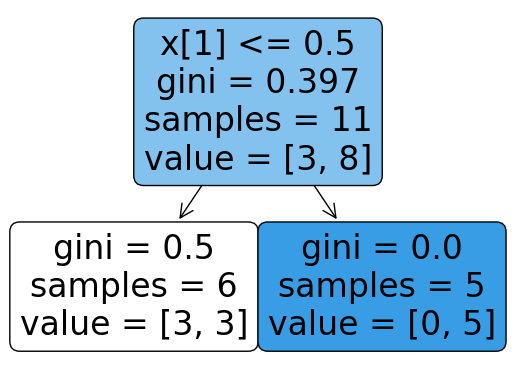

In [90]:
from sklearn.tree import plot_tree


# Visualize the tree
plot_tree(model, filled=True, rounded=True)  # Optional parameters for aesthetics


## Predict

In [92]:
for i in enc_columns:
    print(i[:-1])
    print(df[i[:-1]].unique())
    print(df[i].unique())
    print('----')

age
['young' 'middle' 'old']
[2 0 1]
----
employed
[False  True]
[0 1]
----
own_house
['n' 'y']
[0 1]
----
credit
['fair' 'good' 'excellent']
[1 2 0]
----


In [93]:
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]
y_predict = model.predict(X_input)
print(y_predict)

for i in y_predict:
    print('Result : {}'. format(class_names[i]))

[1 0 1 0]
Result : yes
Result : no
Result : yes
Result : no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualize model

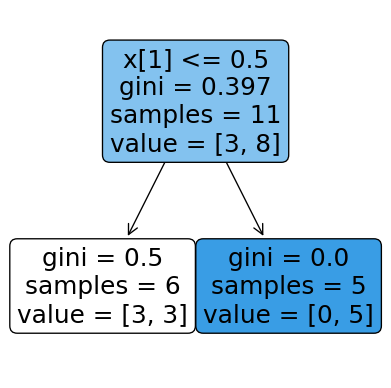

In [94]:
from sklearn.tree import plot_tree

plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=96)
# plt.figure(figsize=(6,6))

plot_tree(model, filled=True, rounded=True)

plt.show()

In [95]:
enc_columns

['age_', 'employed_', 'own_house_', 'credit_']

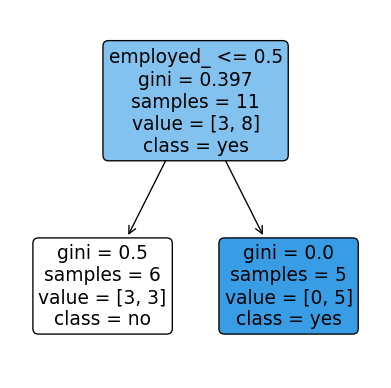

In [96]:
from sklearn.tree import plot_tree

data_feature_names = enc_columns #

plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=96)
plot_tree(model,
         filled=True, rounded=True,
         feature_names=data_feature_names,
         class_names=class_names)

plt.show()

In [97]:
cal_gini(3, 8)

0.39669421487603307

In [98]:
pd.concat([X_train, y_train], axis=1, join='inner')

,age_,employed_,own_house_,credit_,target_
13,1,1,0,0,1
0,2,0,0,1,0
2,2,1,0,2,1
7,0,1,1,2,1
6,0,0,0,2,0
4,2,0,0,1,0
9,0,0,1,0,1
15,1,0,0,0,1
12,1,1,0,2,1
10,1,0,1,0,1


## Prediction (CSV input)

In [100]:
df_pred = pd.read_csv('/content/gdrive/MyDrive/dataset/data/simple_loan_predict.csv')
df_pred.head()

,id,name,age,employed,own_house,credit
0,101,Kob,middle,True,y,fair
1,102,Cala,old,False,n,good
2,103,Alex,old,True,n,fair
3,104,Tim,young,False,y,fair
4,105,Joy,middle,False,n,fair


In [102]:
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df_pred, feature_columns)
df_pred.head()

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_
0,101,Kob,middle,True,y,fair,0,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2
2,103,Alex,old,True,n,fair,1,1,0,1
3,104,Tim,young,False,y,fair,2,0,1,1
4,105,Joy,middle,False,n,fair,0,0,0,1


In [103]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X_input = df_pred[enc_columns]
X_input.head()

,age_,employed_,own_house_,credit_
0,0,1,1,1
1,1,0,0,2
2,1,1,0,1
3,2,0,1,1
4,0,0,0,1


In [106]:
y_predict = model.predict(X_input)
df_pred['predict'] = y_predict
df_pred

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_,predict,result
0,101,Kob,middle,True,y,fair,0,1,1,1,1,yes
1,102,Cala,old,False,n,good,1,0,0,2,0,no
2,103,Alex,old,True,n,fair,1,1,0,1,1,yes
3,104,Tim,young,False,y,fair,2,0,1,1,0,no
4,105,Joy,middle,False,n,fair,0,0,0,1,0,no
5,106,Jib,middle,False,y,excellent,0,0,1,0,0,no


In [107]:
df_pred['result'] = class_names[df_pred.predict]
columns = ['id','name','age','employed','own_house','credit','result']
print('Result...')
df_pred[columns]

Result...


,id,name,age,employed,own_house,credit,result
0,101,Kob,middle,True,y,fair,yes
1,102,Cala,old,False,n,good,no
2,103,Alex,old,True,n,fair,yes
3,104,Tim,young,False,y,fair,no
4,105,Joy,middle,False,n,fair,no
5,106,Jib,middle,False,y,excellent,no


In [108]:
df_pred

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_,predict,result
0,101,Kob,middle,True,y,fair,0,1,1,1,1,yes
1,102,Cala,old,False,n,good,1,0,0,2,0,no
2,103,Alex,old,True,n,fair,1,1,0,1,1,yes
3,104,Tim,young,False,y,fair,2,0,1,1,0,no
4,105,Joy,middle,False,n,fair,0,0,0,1,0,no
5,106,Jib,middle,False,y,excellent,0,0,1,0,0,no


In [111]:
!pip show openpyxl
!pip install openpyxl

Name: openpyxl
Version: 3.1.2
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: et-xmlfile
Required-by: 
